## Data Visualization — Data Science Tutorial

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

### Pandas plots

In [2]:
reviews = pd.read_csv('./Data/winemag-data_first150k.csv', index_col=0)
reviews.head(1)
reviews.columns, reviews.shape
reviews.isna().sum()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


(Index(['country', 'description', 'designation', 'points', 'price', 'province',
        'region_1', 'region_2', 'variety', 'winery'],
       dtype='object'), (150930, 10))

country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

#### Bar charts and categorical data

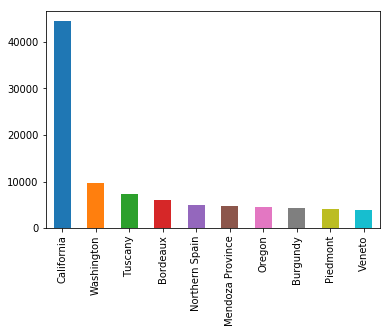

In [3]:
# using pandas visualization - number of wines(samples) per province
reviews.province.value_counts().head(10).plot.bar();

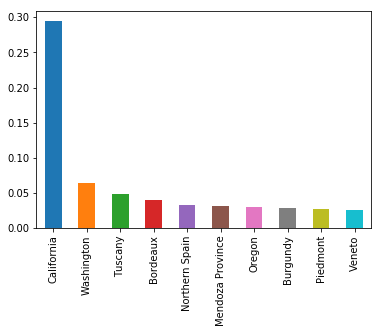

In [4]:
# taking percentages point of view shows how big is advantage of Calif.
(reviews.province.value_counts().head(10) / len(reviews)).plot.bar();

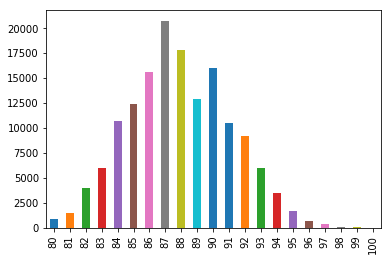

In [5]:
# example of ordinal category is a number of samples for a certain score
# it needs sort_index method because value_counts() ia an unordered
reviews['points'].value_counts().sort_index().plot.bar();

#### Line charts

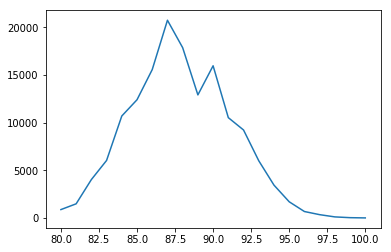

In [6]:
# the same data as above but for bigger numbers of different categories
# line chart would be better
reviews.points.value_counts().sort_index().plot.line();

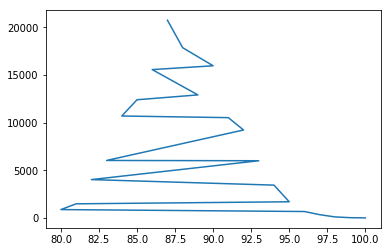

In [7]:
# without sorting an index the result is a mess
reviews.points.value_counts().plot.line();

#### Area charts

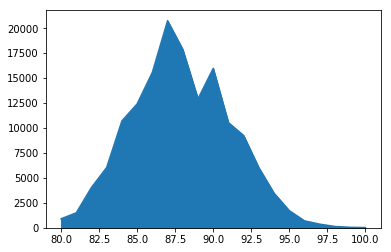

In [8]:
# the same as line chart but with fulfilled area below line chart
reviews.points.value_counts().sort_index().plot.area();

#### Histograms

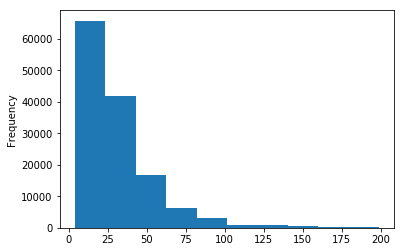

In [9]:
# an example of histogram where frequency means the number of wines
# with prices being in one bin (some singular distance on x axis)
reviews[reviews.price < 200].price.plot.hist();

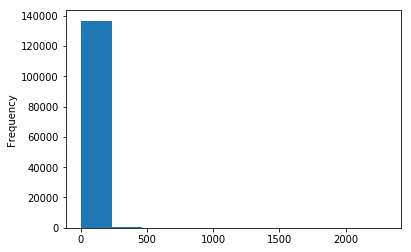

In [10]:
# a major shortcoming of histograms - they don't deal with skewed data
reviews['price'].plot.hist();

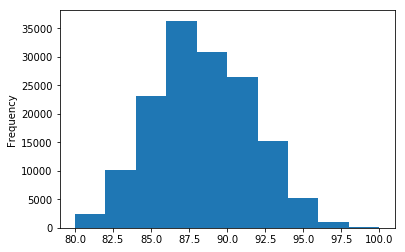

In [11]:
# histograms work really well also for ordinal categorical variables
reviews['points'].plot.hist();

### Bivariate variables

#### Scatter plot

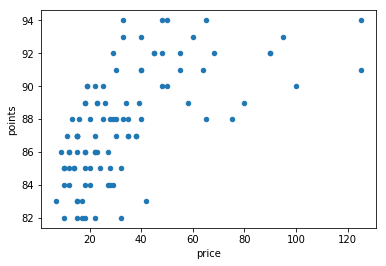

In [12]:
# scatter plot simply maps each variable of interest to a point in 
# two-dimensional space - takes only a number of samples
reviews[reviews['price'] < 200].sample(100).plot.scatter(
    x='price', y='points');

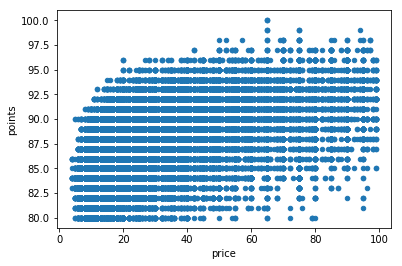

In [13]:
# takig all data, not restricting to some number of samples, make give
# the plot clogged and useless
reviews[reviews.price < 100].plot.scatter(x='price', y='points');

#### Hexplot

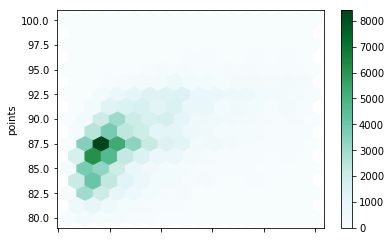

In [14]:
# hexplot is dealing with problem above by aggregating points into 
# hexagons and then colorizing them; gridsize works like resolution
reviews[reviews.price < 100].plot.hexbin(x='price', y='points',
                                        gridsize=15)

#### Stacked plots

In [15]:
# new dataframe with only 5 best wine types where rows are represented
# by variable 'points' and columns by 5 wine types
wine_counts = pd.read_csv('./Data/top-five-wine-score-counts.csv', index_col=0)
wine_counts.head(3)
wine_counts.index, wine_counts.columns

,Bordeaux-style Red Blend,Cabernet Sauvignon,Chardonnay,Pinot Noir,Red Blend
points,,,,,
80,5.0,87.0,68.0,36.0,72.0
81,18.0,159.0,150.0,83.0,107.0
82,72.0,435.0,517.0,295.0,223.0


(Int64Index([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
              93,  94,  95,  96,  97,  98,  99, 100],
            dtype='int64', name='points'),
 Index(['Bordeaux-style Red Blend', 'Cabernet Sauvignon', 'Chardonnay',
        'Pinot Noir', 'Red Blend'],
       dtype='object'))

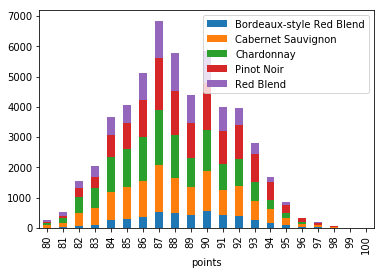

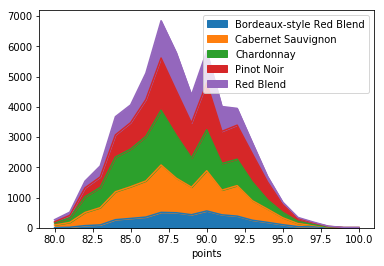

In [16]:
# stacked bar chart and area chart
wine_counts.plot.bar(stacked=True)
wine_counts.plot.area(stacked=True);

#### Bivariate line charts

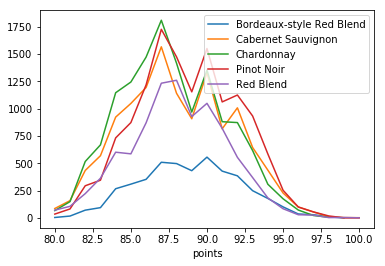

In [17]:
# because of little space it takes line charts are effective to show
# more plots than above and also to interpret it
wine_counts.plot.line();

In [18]:
# new dataframe
pokemon = pd.read_csv('./Data/Pokemon.csv', index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [19]:
pokemon.shape
pokemon.columns

(800, 12)

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

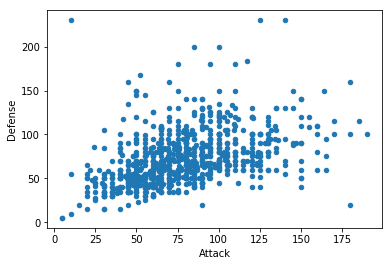

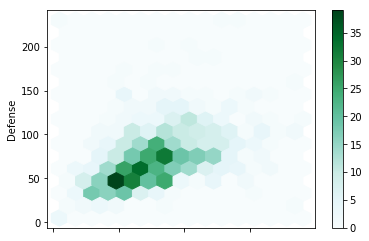

In [20]:
# exercise with coding to get plots as below
pokemon.plot.scatter(x='Attack', y='Defense')
pokemon.plot.hexbin(x='Attack', y='Defense', gridsize=15);

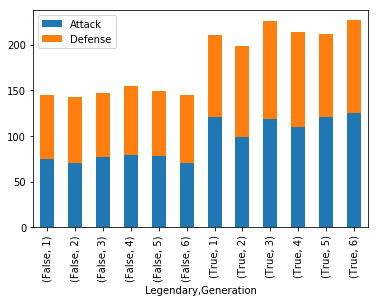

In [21]:
# next exercise with data above
pokemon_stats_legendary = pokemon.groupby(['Legendary',
                        'Generation']).mean()[['Attack', 'Defense']]
#pokemon_stats_legendary
pokemon_stats_legendary.plot.bar(stacked=True);

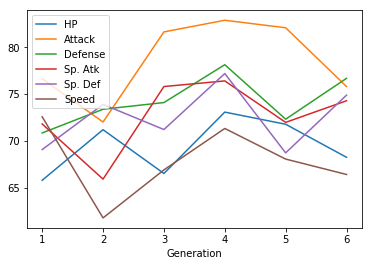

In [22]:
pokemon_stats_by_generation = pokemon.groupby('Generation').mean()[[
    'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]
pokemon_stats_by_generation.plot.line();

### Styling plots

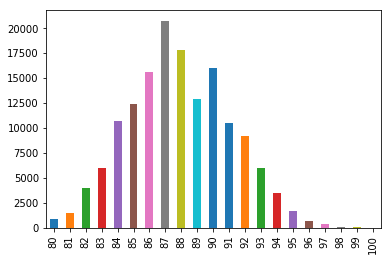

In [23]:
# plot without style - small, no axes titles, legend, plot titles, etc
reviews['points'].value_counts().sort_index().plot.bar();

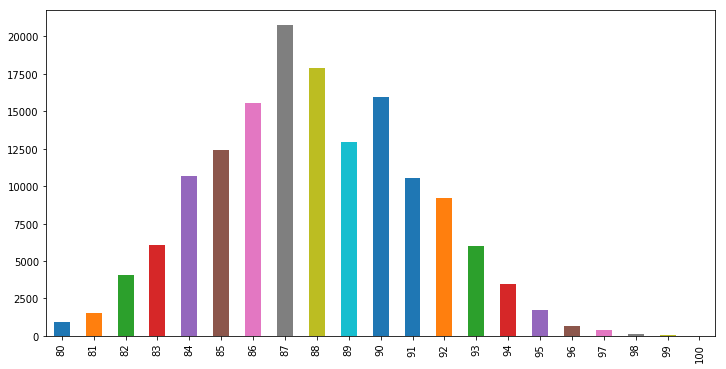

In [24]:
# figsize controls the size of image in inches - it expects a tuple
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12,6));

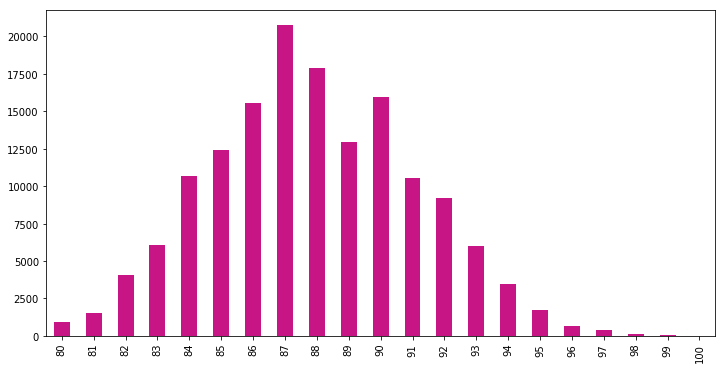

In [25]:
# color has been added, default colors are like a plot above
reviews.points.value_counts().sort_index().plot.bar(figsize=(12,6),
                                     color='mediumvioletred');

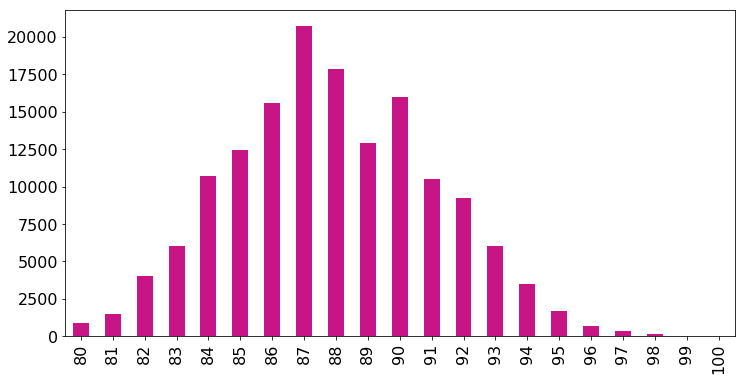

In [26]:
# adding size of text labels for both axes
reviews.points.value_counts().sort_index().plot.bar(figsize=(12,6),
                                color='mediumvioletred', fontsize=16);

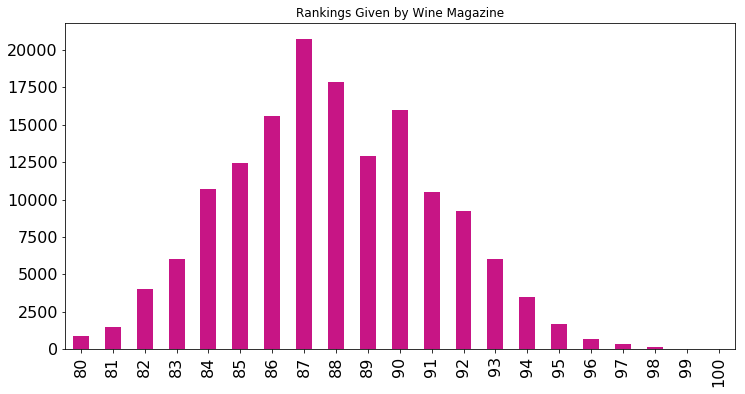

In [27]:
# supplementing the plot with its title
reviews.points.value_counts().sort_index().plot.bar(
                        figsize=(12,6),
                        color='mediumvioletred',
                        fontsize=16,
                        title='Rankings Given by Wine Magazine');

Text(0.5, 1.0, 'Rankings Given by Wine Magazine')

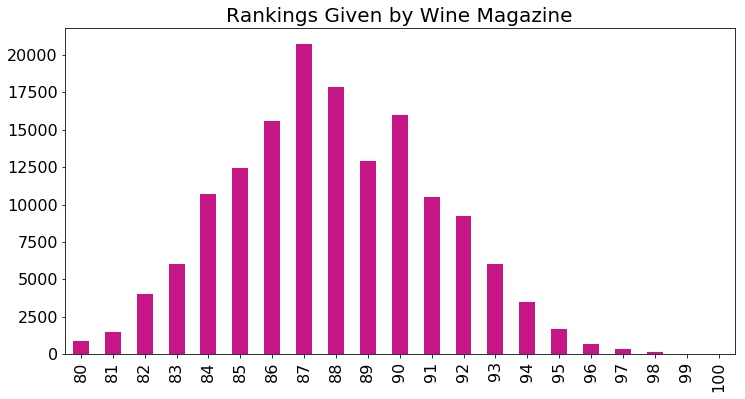

In [28]:
# the title looks so small but in pandas there is no immediate tool so.
import matplotlib.pyplot as plt

ax = reviews.points.value_counts().sort_index().plot.bar(
        figsize=(12,6),
        color='mediumvioletred',
        fontsize=16)
ax.set_title('Rankings Given by Wine Magazine', fontsize=20)

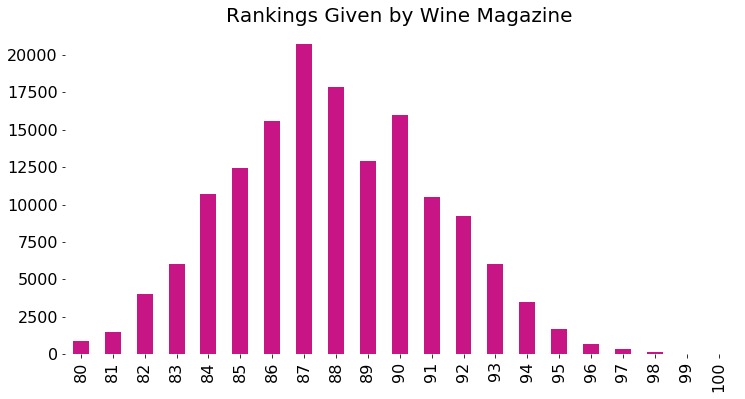

In [29]:
# using seaborn style and its despine() method makes plot even nicer
# while the black borders of the plot are turned off
import seaborn as sns
ax = reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12,6),
    color='mediumvioletred',
    fontsize=16)
ax.set_title('Rankings Given by Wine Magazine', fontsize=20)
sns.despine(bottom=True, left=True);

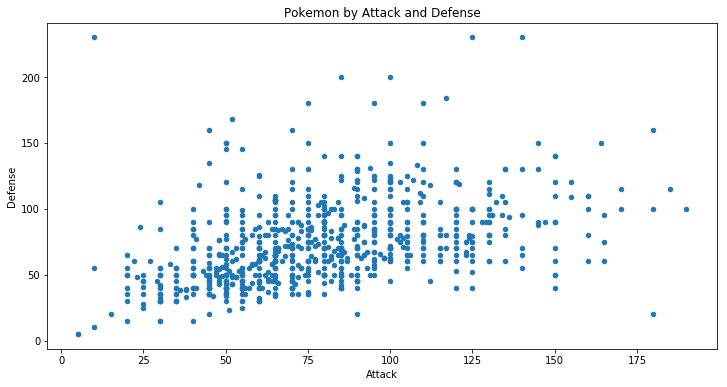

In [30]:
# plotting exercises (the plot is shown but without code - has to be replicated)
pokemon.plot.scatter(x='Attack',
                     y='Defense',
                     figsize=(12,6),
                    title='Pokemon by Attack and Defense');

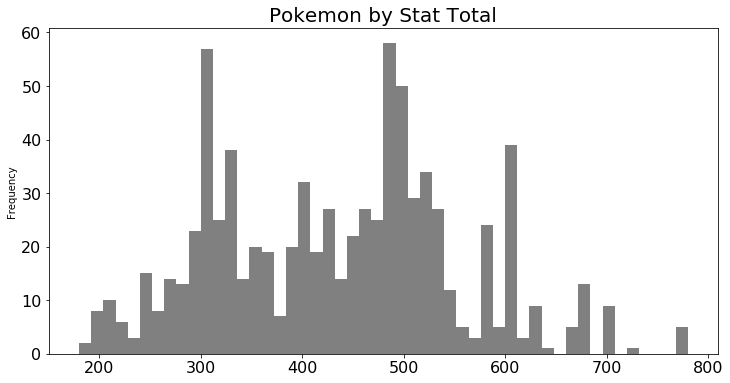

In [31]:
ax = pokemon['Total'].plot.hist(
                                figsize=(12,6),
                                color='grey',
                                fontsize=16,
                                bins=50)
ax.set_title('Pokemon by Stat Total', fontsize=20);

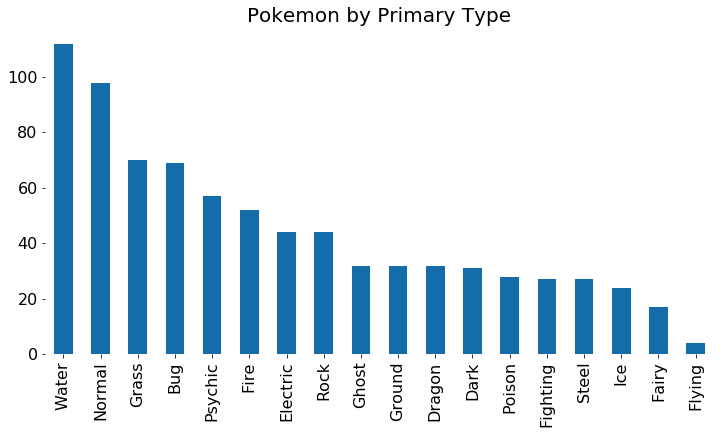

In [32]:
# another plot for exercising
ax = pokemon['Type 1'].value_counts().plot.bar(
        figsize=(12,6),
        color='#146CAB',
        fontsize=16)
ax.set_title('Pokemon by Primary Type', fontsize=20)
sns.despine(bottom=True, left=True);

### Subplots

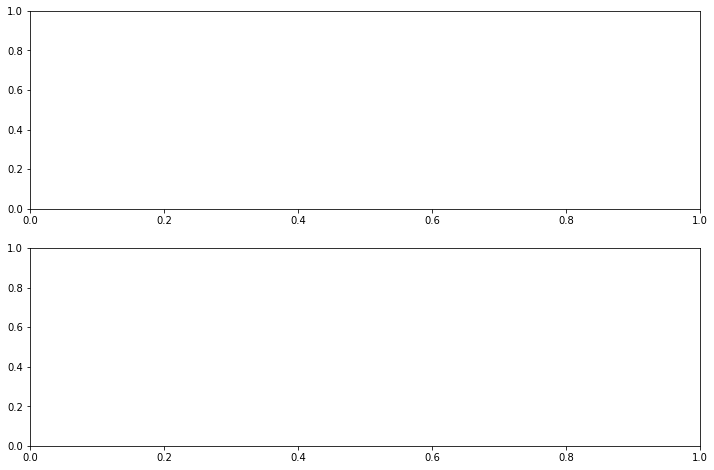

In [33]:
# creating multiple plots in one overall figure (variable names not so
# important but fig, ax are the most recognizable, axarr means array of axes)
# subplots take 2 arguments: first-rows number, second-columns number
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 1, figsize=(12,8))

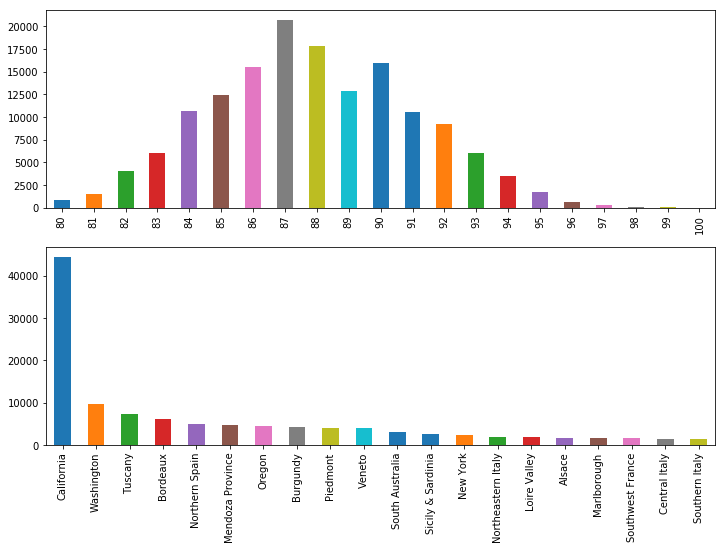

In [34]:
# making one of the plots needs passing to pandas the proper object via
# 'ax' parameter (inside plot.bar() for example)
fig, axarr = plt.subplots(2, 1, figsize=(12,8))

reviews['points'].value_counts().sort_index().plot.bar(ax=axarr[0])

reviews['province'].value_counts().head(20).plot.bar(ax=axarr[1]);

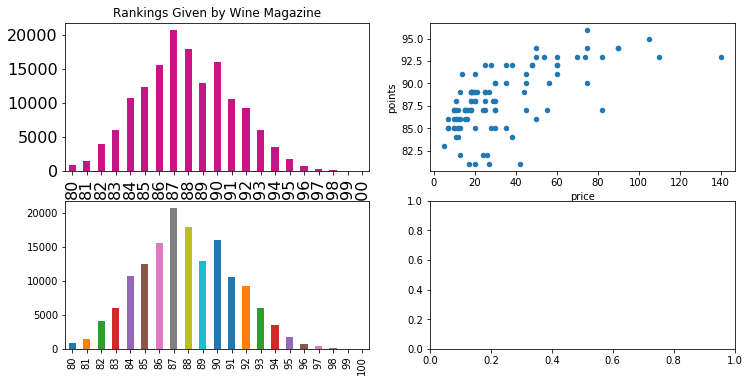

In [35]:
# there are no limits in number of plots for a figure unless visuality
fig, axarr = plt.subplots(2, 2, figsize=(12,8))
reviews.points.value_counts().sort_index().plot.bar(ax=axarr[1][0])
reviews[reviews['price'] < 200].sample(100).plot.scatter(
    ax=axarr[0][1],
    x='price',
    y='points')
reviews.points.value_counts().sort_index().plot.bar(
                        ax=axarr[0][0],
                        figsize=(12,6),
                        color='mediumvioletred',
                        fontsize=16,
                        title='Rankings Given by Wine Magazine');

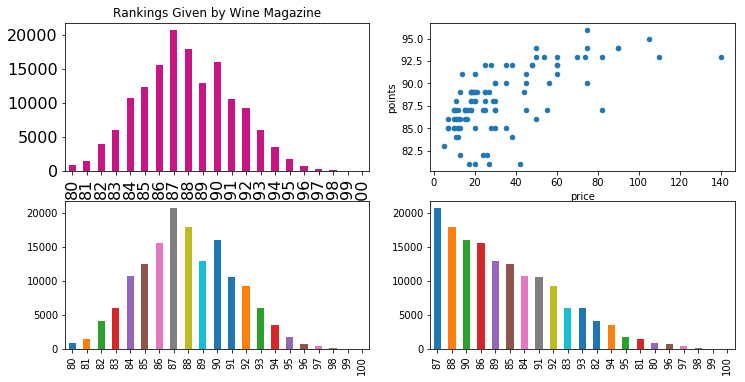

In [36]:
# adding next plot to figure object 
fig.add_axes(reviews.points.value_counts().plot.bar(ax=axarr[1,1]))
fig

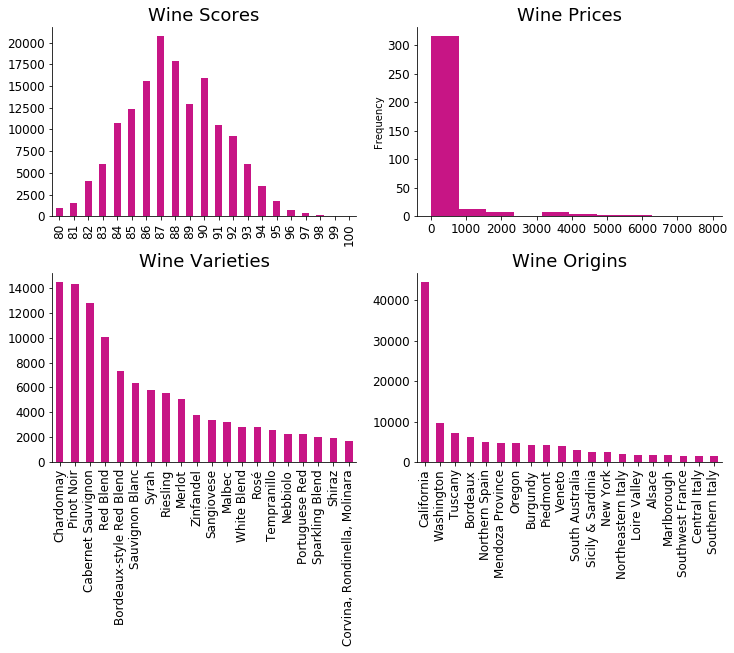

In [37]:
# fine example of plots with styling from matplotlib and seaborn
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

reviews['points'].value_counts().sort_index().plot.bar(
    ax=axarr[0][0], fontsize=12, color='mediumvioletred')
axarr[0][0].set_title("Wine Scores", fontsize=18)

reviews['variety'].value_counts().head(20).plot.bar(
    ax=axarr[1][0], fontsize=12, color='mediumvioletred')
axarr[1][0].set_title("Wine Varieties", fontsize=18)

reviews['province'].value_counts().head(20).plot.bar(
    ax=axarr[1][1], fontsize=12, color='mediumvioletred')
axarr[1][1].set_title("Wine Origins", fontsize=18)

reviews['price'].value_counts().plot.hist(
    ax=axarr[0][1], fontsize=12, color='mediumvioletred')
axarr[0][1].set_title("Wine Prices", fontsize=18)

plt.subplots_adjust(hspace=.3)

import seaborn as sns
sns.despine();

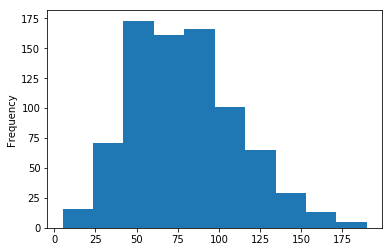

In [38]:
pokemon.head(2)
pokemon.Attack.sort_index().plot.hist();

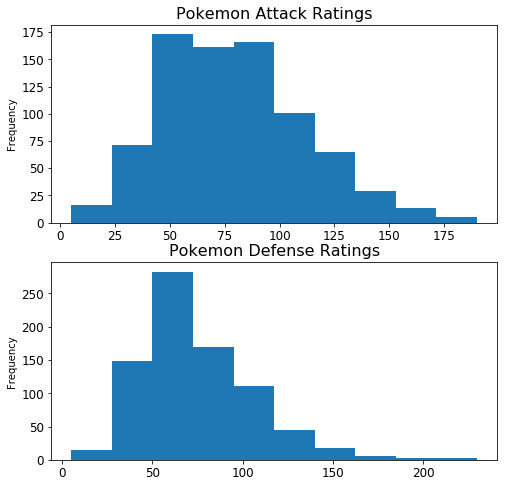

In [39]:
# exercising
fig, axarr = plt.subplots(2, 1, figsize=(8,8))

pokemon.Attack.plot.hist(ax=axarr[0], fontsize=12)
axarr[0].set_title('Pokemon Attack Ratings', fontsize=16)

pokemon.Defense.plot.hist(ax=axarr[1], fontsize=12)
axarr[1].set_title('Pokemon Defense Ratings', fontsize=16)

plt.subplots_adjust(hspace=.2);

### Plotting with Seaborn

#### Countplot

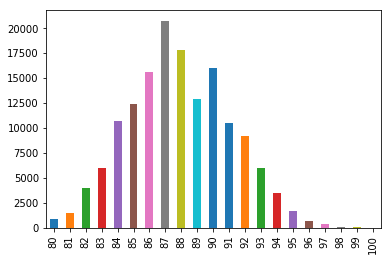

In [40]:
# countplot() is an equivalent to pandas bar plot
reviews['points'].value_counts().sort_index().plot.bar();

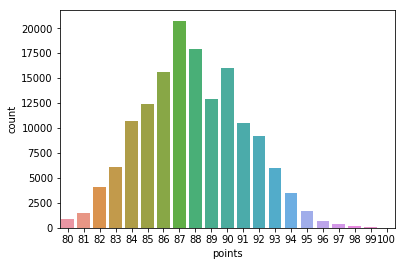

In [41]:
# code is easier and (only to remember function) and view better
sns.countplot(reviews['points']);

#### KDE Plot

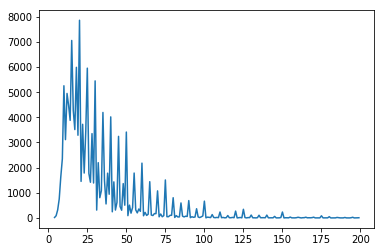

In [42]:
# pandas line chart - quite long code, 'jagged' because of disruptive changes
# in data
reviews[reviews.price < 200].price.value_counts().sort_index().plot.line();

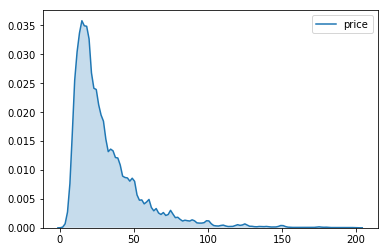

In [43]:
# seaborn chart is not 'jagged' - it is 'smoothed' but shows so called
# 'kernel density estimate' - probability not frequency of some x data
sns.kdeplot(reviews.query('price < 200').price, shade=True);

c:\users\14000322\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


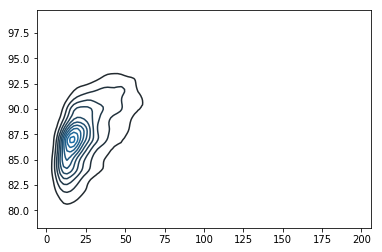

In [44]:
# kdeplot() with 2 variables returns two dimensional chart (bivariate)
# code with data given as a dataframe - is being deprecated
sns.kdeplot(reviews[
    reviews.price < 200].loc[:,['price','points']].dropna().sample(5000));

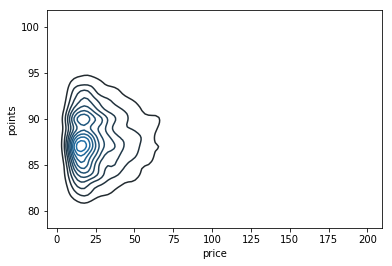

In [45]:
# code with data like x,y being pd.Series; every time running this
#code it returns another shape due to different sampling

sns.kdeplot(reviews[reviews.price < 200].price.sample(5000),
            reviews[reviews.price<200].points.sample(5000));

#### Distplot

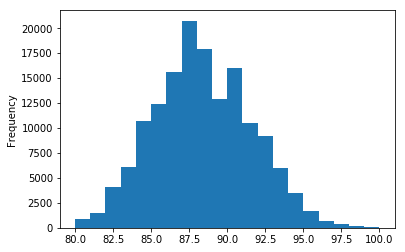

In [46]:
# distplot() is an equivalent to pandas histogram
reviews.points.plot.hist(bins=20);

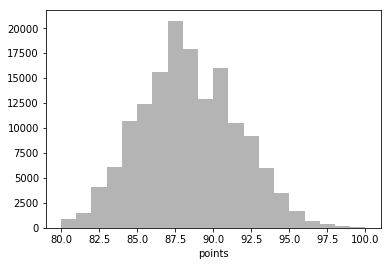

In [47]:
# distplot has als kde plot but it is optional
sns.distplot(reviews.points, bins=20, kde=False, color='#454545');

#### Scatterplot and Hexplot with jointplot()

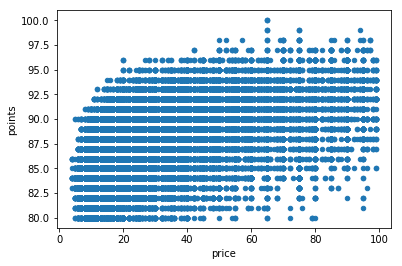

In [48]:
# pandas scatter() is equivalent to scatterplot/jointplot but without
# sideway histograms
reviews[reviews.price < 100].plot.scatter(x='price', y='points');

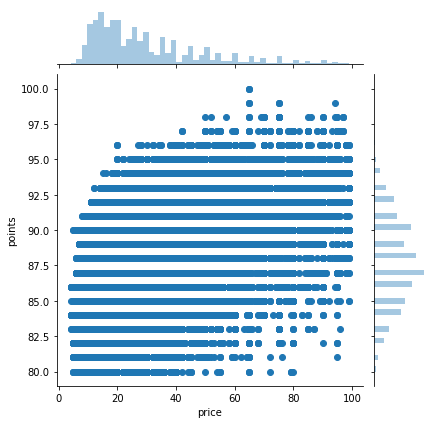

In [49]:
# plotting two variables against one another is a composite plot,
# default kind='scatter', on the sides are histograms of both vars

sns.jointplot(x='price', y='points',
              data=reviews[reviews.price < 100],
             kind='scatter');

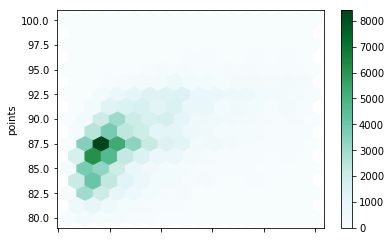

In [50]:
# hexbin() is pandas equivalent to hexplot but no sideway plots
reviews[reviews.price < 100].plot.hexbin(
                            x='price', y='points', gridsize=15);

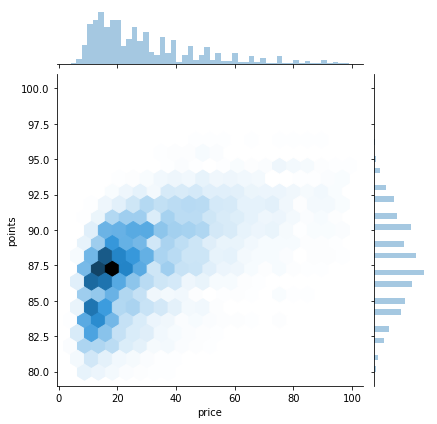

In [51]:
# hexplot is being made by using kind='hex'(also:'reg','resid','kde')
sns.jointplot(x='price', y='points',
              data=reviews[reviews.price < 100],
             kind='hex', gridsize=20);

#### Boxplot and Violinplot

In [52]:
reviews.head(1)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz


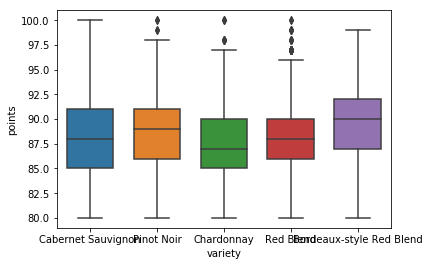

In [53]:
# creating dataframe with only top 5 wine brands (isin() method makes
# selection of all samples/rows - it is a filter type method)
df = reviews[reviews.variety.isin
        (reviews.variety.value_counts().head(5).index)]
#df.variety.unique()

sns.boxplot(x='variety', y='points', data=df, width=.7);

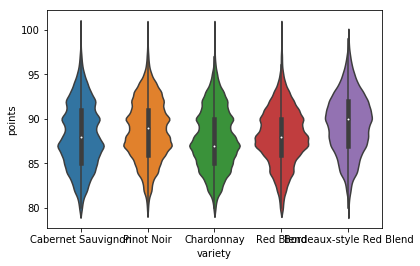

In [54]:
# the similar plot but with an additional info to interpet plot
sns.violinplot(x='variety',
               y='points',
               data=reviews[reviews.variety.isin(
                   reviews.variety.value_counts().head(5).index)]);

In [55]:
pokemon.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


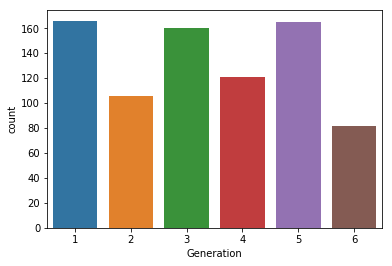

In [56]:
sns.countplot(pokemon.Generation);

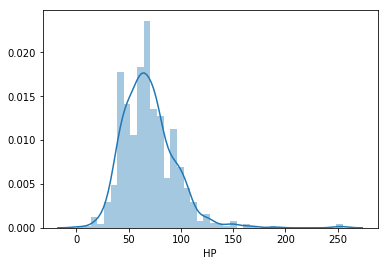

In [57]:
sns.distplot(pokemon['HP']);

c:\users\14000322\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


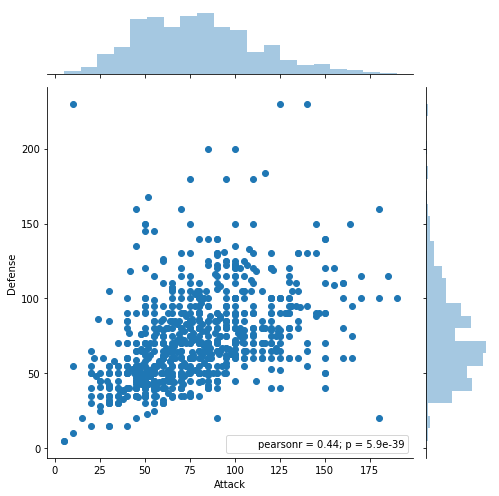

In [58]:
import scipy.stats as stats

j = sns.jointplot(x='Attack', y='Defense', data=pokemon, height=7)
j.annotate(stats.pearsonr);

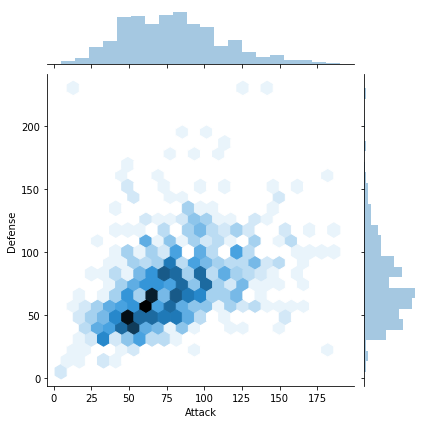

In [59]:
sns.jointplot(kind='hex', x=pokemon.Attack, y=pokemon.Defense);

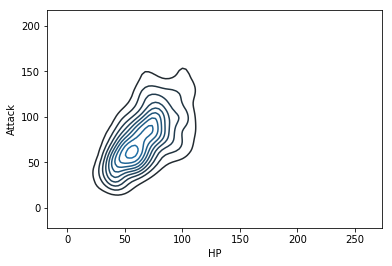

In [60]:
sns.kdeplot(pokemon['HP'], pokemon['Attack']);

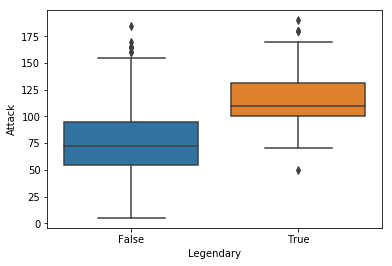

In [61]:
sns.boxplot(x=pokemon.Legendary, y=pokemon.Attack);

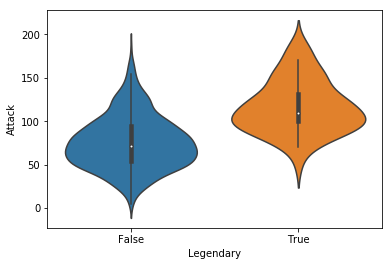

In [62]:
sns.violinplot(x=pokemon.Legendary, y=pokemon.Attack);

### Faceting with Seaborn

In [63]:
# new dataset will be used coming from Kaggle page
import pandas as pd
import re
import numpy as np

pd.set_option('max_columns', None)
df = pd.read_csv('Data/CompleteDataset.csv',
                 index_col=0, low_memory=False)
df.shape
#df.columns
df.head(6)

(17981, 74)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,€565K,2154,92,48,90,95,95,96,77,89,97,95,90,6,11,15,14,8,71,22,68,87,88,13,74,93,95,88,85,26,87,73,28,59,90,85,92.0,45.0,59.0,92.0,84.0,158023,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,RW,92.0,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,€280K,2100,94,56,96,82,95,92,75,81,96,89,84,9,9,15,15,11,62,36,61,75,77,21,81,90,88,81,80,33,90,78,24,53,80,83,88.0,46.0,59.0,88.0,79.0,190871,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,LW,88.0,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,€510K,2291,88,78,86,60,91,83,77,86,86,94,84,27,25,31,33,37,77,41,69,64,86,30,85,92,93,83,87,38,77,89,45,80,84,88,87.0,58.0,65.0,88.0,80.0,176580,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,ST,87.0,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,€230K,1493,58,29,52,35,48,70,15,14,30,13,11,91,90,95,91,89,25,30,78,59,16,10,47,12,85,55,25,11,61,44,10,83,70,11,NaN,NaN,NaN,NaN,NaN,167495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,€355K,2143,79,80,78,80,89,87,62,77,85,91,84,15,6,12,8,10,85,39,84,65,83,25,81,91,91,83,88,19,83,79,42,84,78,87,84.0,57.0,62.0,87.0,78.0,188545,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,ST,84.0,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0


In [64]:
# data preprocessing - some columns with data not correct to make
# computations need to be supplemented with additonal columns
footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0,
            footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] =footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit']=='M',
            footballers['Value (M)'], footballers['Value (M)']/1000)
# 'Preferred Positions' are sometimes doubled so first one
# will be taken as a main one to new column 'Position' 
footballers = footballers.assign(Value=footballers['Value (M)'],
    Position=footballers['Preferred Positions'].str.split().str[0])

In [65]:
footballers.head(1)
footballers.shape

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Acceleration,Aggression,Agility,Balance,Ball control,Composure,Crossing,Curve,Dribbling,Finishing,Free kick accuracy,GK diving,GK handling,GK kicking,GK positioning,GK reflexes,Heading accuracy,Interceptions,Jumping,Long passing,Long shots,Marking,Penalties,Positioning,Reactions,Short passing,Shot power,Sliding tackle,Sprint speed,Stamina,Standing tackle,Strength,Vision,Volleys,CAM,CB,CDM,CF,CM,ID,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,Preferred Positions,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,€565K,2228,89,63,89,63,93,95,85,81,91,94,76,7,11,15,14,11,88,29,95,77,92,22,85,95,96,83,94,23,91,92,31,80,85,88,89.0,53.0,62.0,91.0,82.0,20801,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,ST LW,89.0,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST


(17981, 77)

#### The Facet Grid

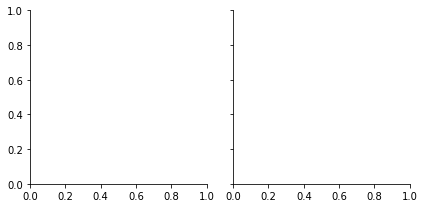

In [66]:
import seaborn as sns

# new (temporary) dataframe to have only players with only
# 'ST' and 'GK' positions (striker and goalkeeper)
df = footballers[footballers['Position'].isin(['ST','GK'])]
#df.head()
# prepared FacetGrid object - there are 2 value in 'Position' so
# place for 2 plots prepared
g = sns.FacetGrid(df, col='Position')

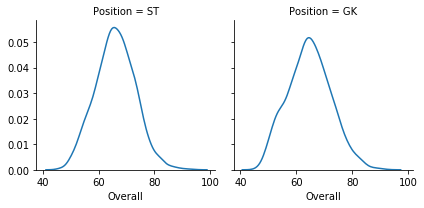

In [67]:
# every time where the figure('g') object was plotted the next one has to be created
g = sns.FacetGrid(df, col='Position')
g.map(sns.kdeplot, "Overall");

15

array(['ST', 'RW', 'LW', 'GK', 'CDM', 'CB', 'RM', 'CM', 'LM', 'LB', 'CAM',
       'RB', 'CF', 'RWB', 'LWB'], dtype=object)

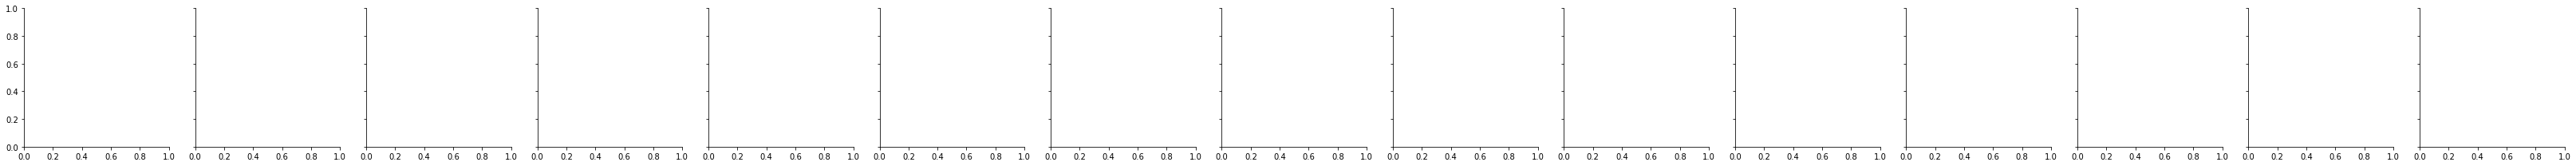

In [68]:
# taking all data (with all possible players positions)
df = footballers
# counting how many values is in the 'Position' column
len(df.Position.unique())
df.Position.unique()
# there are as many as 15 possible positions so the plots
# will be really squeezed in only 1 row
g = sns.FacetGrid(df, col='Position')

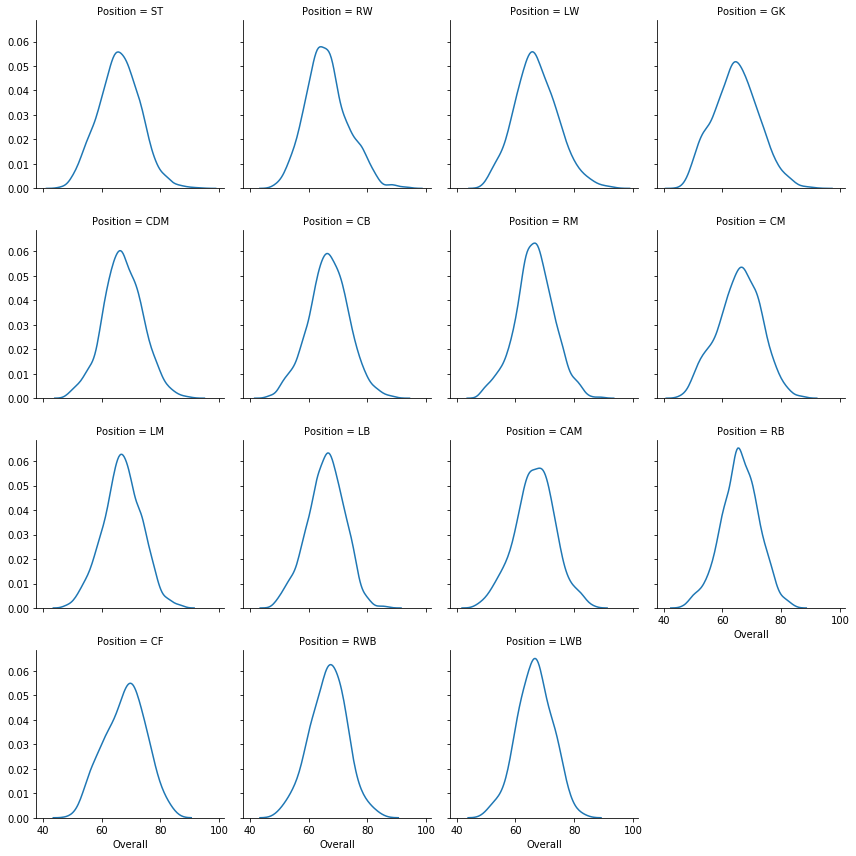

In [69]:
# to avoid such a mess col_wrap parameter is helpful
g = sns.FacetGrid(df, col='Position', col_wrap=4)
g.map(sns.kdeplot, 'Overall');

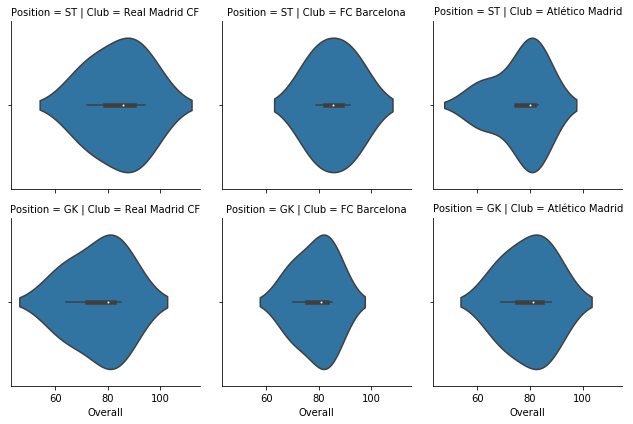

In [70]:
# FacetGrid allows to lay data out by row and column as in the 
# example below: row=Position, col=Club

# filtering only 'strikers' and 'goalkeepers'
df = footballers[footballers.Position.isin(['ST','GK'])]
# next filter for 'df' dataframe - for three clubs only
df = df[df.Club.isin(['Atlético Madrid','Real Madrid CF','FC Barcelona'])]

g = sns.FacetGrid(df, row='Position', col='Club')
g.map(sns.violinplot, 'Overall', order=None);

#### Pairplot

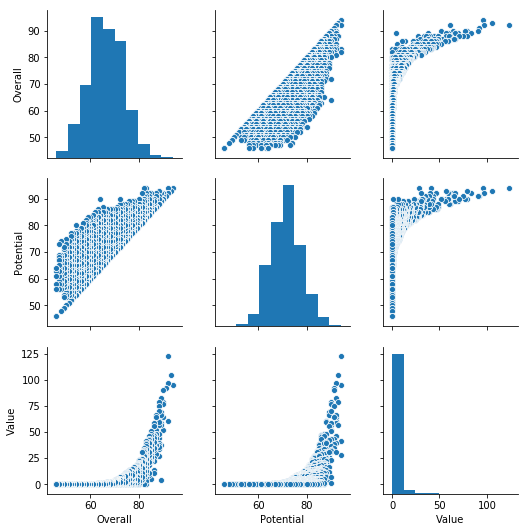

In [71]:
# pairplot() is seaborn method for faceting variables as
# opposed to variable values.
sns.pairplot(footballers[['Overall','Potential','Value']]);

In [72]:
pokemon.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


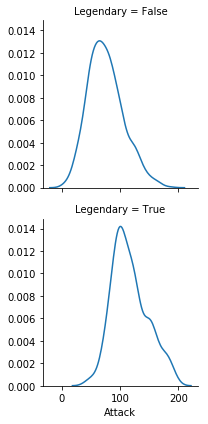

In [73]:
g = sns.FacetGrid(pokemon, row='Legendary')
g.map(sns.kdeplot, 'Attack');

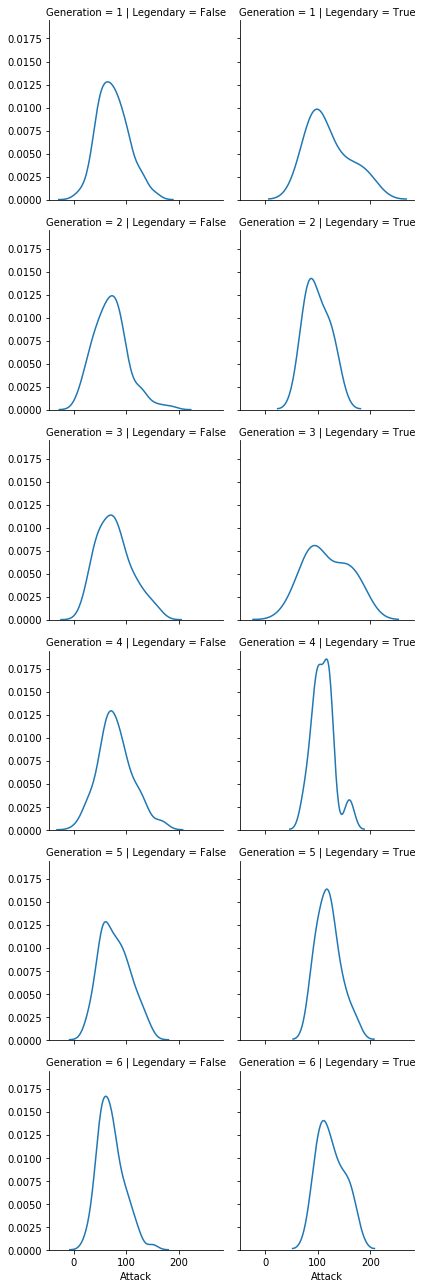

In [74]:
g = sns.FacetGrid(pokemon, row='Generation', 
                  col='Legendary')
g.map(sns.kdeplot, 'Attack');

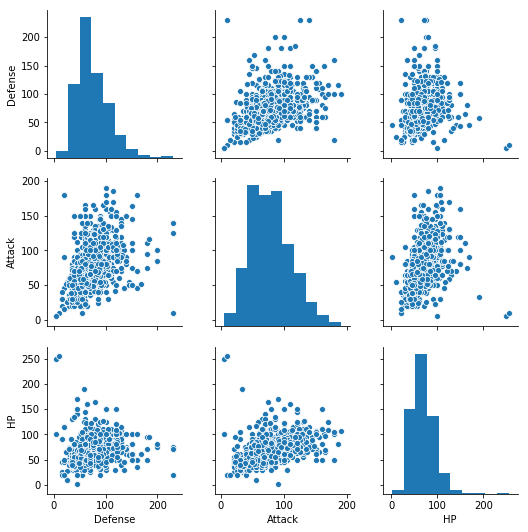

In [75]:
sns.pairplot(pokemon[['Defense','Attack','HP']]);

### Multivariate Plotting

#### Multivariate Scatter Plots

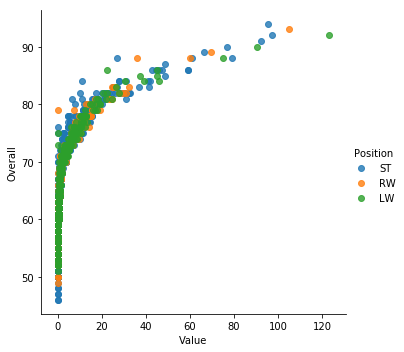

In [76]:
# working with 'footballers' dataframe
# learning which type of offensive players tends to get
# paid the most: striker, left-winger, right-winger
# hue parameter returns colors visualization for given variable
sns.lmplot(x='Value', y='Overall', hue='Position', 
           data=footballers.loc[footballers.Position.isin(
               ['ST','RW','LW'])],
          fit_reg=False);

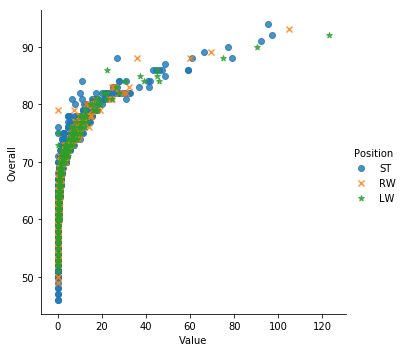

In [77]:
# shape parameter helps with additional visualization
# lmplot() is a scatterplot kind taking only strings as 
# x and y parameters(regplot() is more flexible)
sns.lmplot(x='Value', y='Overall', markers=['o','x','*'],
          hue='Position',
          data=footballers.loc[footballers.Position.isin(['ST','RW','LW'])],
          fit_reg=False);

#### Grouped Box Plot

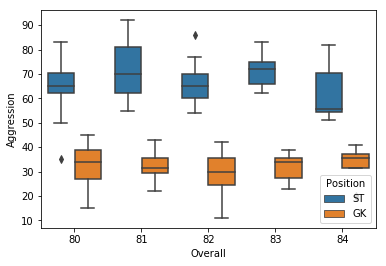

In [78]:
# learning if strikers score higher on 'Aggression' than goalkeepers?

# dataframe after filtering 'Positions' and then choosing only 4 cols
f = (footballers.loc[footballers.Position.isin(
    ['ST','GK'])].loc[:,['Value','Overall','Aggression','Position']])
#f.head()

# filtering samples with 'Overall' values between <80,85)
f = f[f['Overall'] >= 80]
f = f[f['Overall'] < 85]

f['Aggression'] = f['Aggression'].astype(float)
sns.boxplot(x='Overall', y='Aggression', hue='Position', data=f);

### Summarization

#### Heatmap

,Acceleration,Aggression,Agility,Balance,Ball control
Acceleration,1.000000,0.253392,0.799476,0.702341,0.671947
Aggression,0.253392,1.000000,0.236537,0.184877,0.541160
Agility,0.799476,0.236537,1.000000,0.766645,0.701899
Balance,0.702341,0.184877,0.766645,1.000000,0.598220
Ball control,0.671947,0.541160,0.701899,0.598220,1.000000


(5, 5)

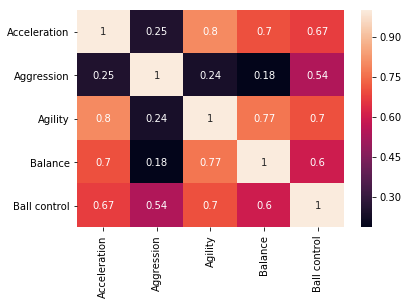

In [114]:
# Heatmap() is the correlation plot with colors as results
f = footballers.loc[:,['Acceleration','Aggression','Agility',
                      'Balance', 'Ball control']].applymap(
lambda v: int(v) if str.isdecimal(v) else np.nan).dropna().corr()
f.head()
f.shape
sns.heatmap(f, annot=True)

#### Parralel Coordinates

,Acceleration,Aggression,Agility,Balance,Ball control,Position
16186,59.0,38.0,57.0,66.0,54.0,ST


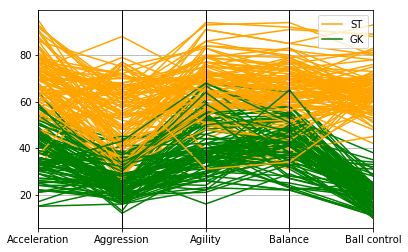

In [94]:
# Parallel coordinates plots are great for determining how distinguishable
# different classes are in the data.
from pandas.plotting import parallel_coordinates

# dataframe made after index selection(iloc) of 5 columns, and next
# filtering through 'Position' column(loc method) for the samples complying
# with condition isin(['ST','GK']) and with applymap() fuction returning
# integers or NaNs if value is not decimal type
f = (footballers.iloc[:, 12:17].loc[footballers['Position'].isin(
['ST','GK'])].applymap(lambda v: int(v) if str.isdecimal(v) else np.nan).dropna())

f['Position'] = footballers['Position']
f = f.sample(200)
f.head(1)
parallel_coordinates(f, 'Position', color=['orange','green'])

#### Exercises

In [120]:
pokemon.head(1)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


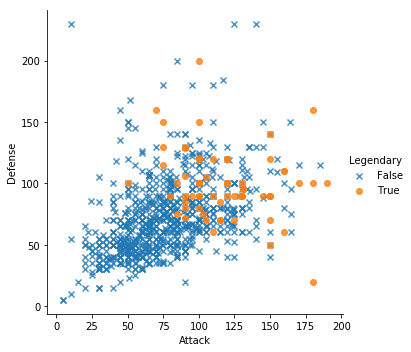

In [102]:
sns.lmplot(x='Attack', y='Defense', hue='Legendary',
           data=pokemon, markers=['x','o'], fit_reg=False);

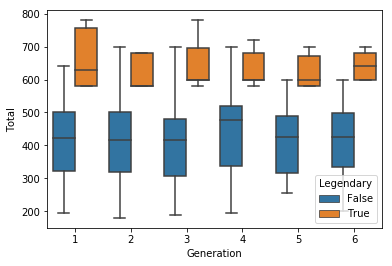

In [103]:
sns.boxplot(x='Generation', y='Total', hue='Legendary',
           data=pokemon)

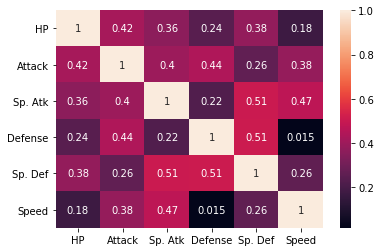

In [122]:
f = pokemon[
    ['HP','Attack','Sp. Atk','Defense','Sp. Def','Speed']].dropna().corr()
sns.heatmap(f, annot=True);

In [140]:
pokemon.head(1)
pokemon.columns

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False


Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

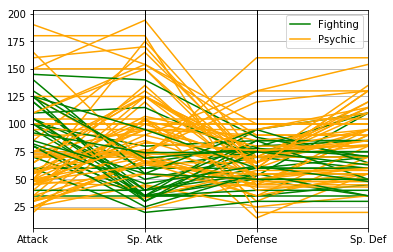

In [149]:
f = pokemon[['Attack','Sp. Atk', 'Defense', 'Sp. Def','Type 1']].loc[
    pokemon['Type 1'].isin(['Fighting','Psychic'])]

parallel_coordinates(f, 'Type 1', color=['green','orange']);

### Introduction to Plotly

In [158]:
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [159]:
reviews = pd.read_csv('./Data/winemag-data-130k-v2.csv', index_col=0)
reviews.shape
reviews.columns
reviews.head(2)

(129971, 13)

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'region_2', 'taster_name', 'taster_twitter_handle', 'title',
       'variety', 'winery'],
      dtype='object')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos


In [160]:
iplot([go.Scatter(x=reviews.head(1000)['points'],
                 y=reviews.head(1000)['price'], mode='markers')]);